In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [3]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [55]:
_model = pd.read_csv("CSR_SpMV_Model_of_Random_BrCast_Reduce.csv")
_model.groupby("nProcess").count().reset_index()

,nProcess,MatrixSize,PartitionRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,NonZeroPerRow,NonZeroPerBlock
0,900,110,110,110,110,110,110,110,110,110,110,110


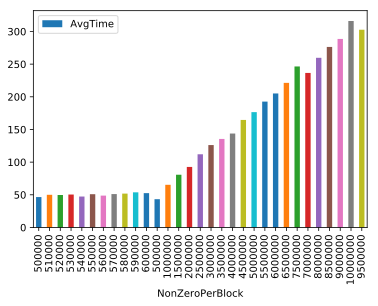

In [79]:
_model_900 = _model[_model["nProcess"] == 900]

_model_900 = _model_900.reset_index(drop=True)
_model_900[_model_900["PartitionRow"] == 500000].plot(kind="bar", x="NonZeroPerBlock", y="AvgTime")

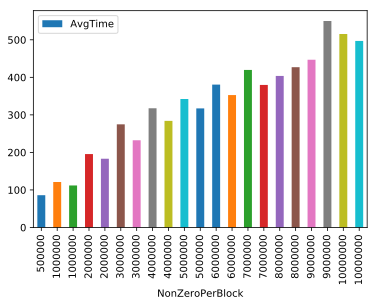

In [85]:
_model_900[_model_900["PartitionRow"] == 2000000].sort_values(by=["NonZeroPerBlock"]).plot(kind="bar", x="NonZeroPerBlock", y="AvgTime")

In [4]:
skylake_2d = pd.read_csv("Skylake_CSR_Random_BrCast_Reduce_SpMV.csv")

In [6]:
skylake_2d

,Name,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
0,ecology1_random_16,1000000,250000,2.318867,3.120388,2.903957,0.292664,2.159517,0.565229,100,16,1.000872,249750.0,250218
1,copter2_random_16,55476,13869,0.160461,0.234354,0.187257,0.018014,0.126863,0.089378,100,16,3.198789,44029.0,44364
2,G3_circuit_random_16,1585478,396370,4.359110,5.262777,5.005229,0.470152,3.541989,1.122079,100,16,0.959737,379709.0,380411
3,kkt_power_random_16,2063494,515874,7.228672,8.302272,7.934356,0.597998,6.275942,1.428047,100,16,1.575757,810290.0,812892
4,coPapersCiteseer_random_16,434102,108526,6.017362,6.468354,6.305702,0.125518,5.864373,0.478142,100,16,18.534489,2004590.0,2011474
5,coPapersDBLP_random_16,540486,135122,7.220228,7.813411,7.517998,0.185622,7.111341,0.516080,100,16,14.162253,1905716.0,1913632
6,AS365_random_16,3799275,949819,18.331537,20.627638,19.917610,1.398028,14.792089,4.130806,100,16,1.498313,1421009.0,1423126
7,NLR_random_16,4163763,1040941,19.992642,22.487213,21.917143,1.544897,17.383154,3.544068,100,16,1.501102,1560997.0,1562559
8,333SP_random_16,3712815,928204,15.573091,20.730397,19.279209,1.401985,15.336203,3.991736,100,16,1.498547,1388579.0,1390957
9,thermal2_random_16,1227087,306772,4.500020,5.495475,5.129109,0.432601,4.021345,0.864742,100,16,1.499514,459516.0,460009


/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Name,MatrixSize,AvgReduceTime,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock,NZB
0,copter2_random_16,55476,0.089378,3.198789,44029.0,44364,0.793659
1,coPapersCiteseer_random_16,434102,0.478142,18.534489,2004590.0,2011474,4.617786
2,coPapersDBLP_random_16,540486,0.516080,14.162253,1905716.0,1913632,3.525930
3,ecology1_random_16,1000000,0.565229,1.000872,249750.0,250218,0.249750
4,thermal2_random_16,1227087,0.864742,1.499514,459516.0,460009,0.374477
5,G3_circuit_random_16,1585478,1.122079,0.959737,379709.0,380411,0.239492
6,kkt_power_random_16,2063494,1.428047,1.575757,810290.0,812892,0.392679
7,M6_random_16,3501776,3.008841,1.503203,1312742.0,1315970,0.374879
8,333SP_random_16,3712815,3.991736,1.498547,1388579.0,1390957,0.373996
9,AS365_random_16,3799275,4.130806,1.498313,1421009.0,1423126,0.374021


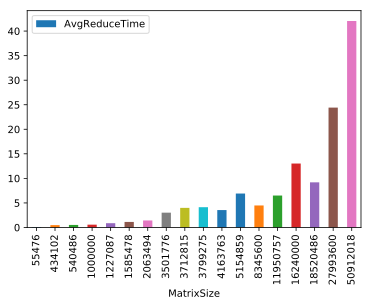

In [30]:
skylake_2d_16 = skylake_2d[skylake_2d["nProcess"] == 16]
skylake_2d_16 = skylake_2d_16.groupby("Name").mean()
skylake_2d_16 = skylake_2d_16.reset_index()
skylake_2d_16 = skylake_2d_16.sort_values(by=["AvgRow"])
skylake_2d_16 = skylake_2d_16.reset_index(drop=True)

skylake_2d_16.plot(kind="bar", x="MatrixSize", y="AvgReduceTime")
data = skylake_2d_16[["Name", "MatrixSize", "AvgReduceTime", "NonZeroPerRow", "AvgNonZeroPerBlock", "MaxNonZeroPerBlock"]]
ratio = []
for index,row in data.iterrows():
    ratio.append(row["AvgNonZeroPerBlock"]/row["MatrixSize"])
data["NZB"] = ratio
data

In [32]:
skylake_2d_100 = skylake_2d_100.reset_index(drop=True)
skylake_2d_100 = skylake_2d_100.sort_values(by=["AvgRow"])
skylake_2d_100[(skylake_2d_100["AvgRow"] > 32768) & (skylake_2d_100["AvgRow"] <= 1310720)]

,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
8,434102,43411,19.930514,187.595889,78.206084,8.658633,1.069159,16.368551,100,100,7.488263,320734.0,325073
9,540486,54049,19.941730,210.168979,87.652596,12.322940,1.187630,15.504770,100,100,5.803179,304914.0,313656
11,1000000,100000,20.938951,298.584350,147.224394,12.767924,0.447508,10.847932,100,100,0.405300,39960.0,40530
18,1227087,122709,23.377957,368.227509,200.354806,12.632761,0.745024,12.625027,100,100,0.603762,73522.0,74087
5,1508065,150807,22.100427,553.483543,292.224056,9.927917,2.486836,10.838562,100,100,3.406175,511642.0,513675
2,1585478,158548,23.394406,564.874602,239.047908,8.964758,0.783460,16.120596,100,100,0.386085,60753.0,61213
17,1821882,182189,30.332773,1090.044577,300.639131,17.368256,3.410621,43.906115,100,100,3.362025,600000.0,612524
13,2063494,206350,25.451574,727.147002,336.934866,11.020790,1.358672,17.940455,100,100,0.638449,129646.0,131744
3,3501776,350178,23.708642,943.834155,409.548062,9.632028,2.376484,15.373527,100,100,0.603302,210038.0,211263
0,3712815,371282,25.069111,1241.498654,487.122923,13.743520,2.497866,18.076743,100,100,0.600883,222172.0,223097


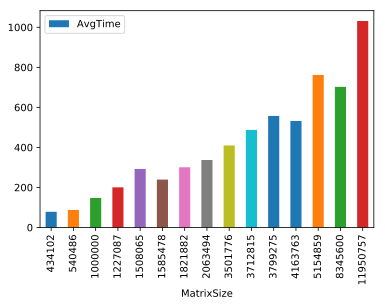

In [38]:
data = skylake_2d_100[(skylake_2d_100["AvgRow"] > 32768) & (skylake_2d_100["AvgRow"] <= 1310720)].sort_values(by=["AvgRow"])
data.plot(kind="bar", x="MatrixSize", y="AvgTime")

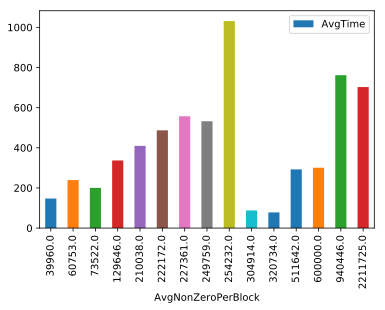

In [39]:
data.sort_values(by=["AvgNonZeroPerBlock"]).plot(kind="bar", x="AvgNonZeroPerBlock", y="AvgTime")

intercept:  [136.54947255]
Coef:  [[8.09991597e-05]]
Linear Equation: y =  136.54947255497603  +  8.099915974291101e-05  * x
Error:  7066.784532551717


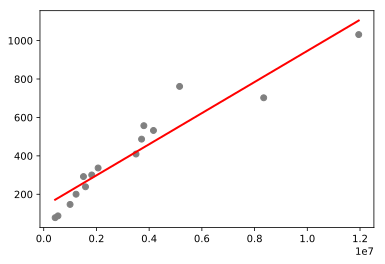

In [47]:
model = LinearRegression()
train_x = data['MatrixSize'][:, np.newaxis]
train_y = data['AvgTime'][:, np.newaxis]
model.fit(train_x, train_y)
pred_y = model.predict(train_x)
print('intercept: ', model.intercept_)
print('Coef: ', model.coef_)
print('Linear Equation: y = ', model.intercept_[0], ' + ',  model.coef_[0][0], ' * x')
print('Error: ', mean_squared_error(train_y, pred_y))

plt.scatter(train_x, train_y,  color='gray')
plt.plot(train_x, pred_y, color='red', linewidth=2)
plt.show()